## Be Heart Smart EDA on final cardio bmi complete data connected to Db

In [1]:
# Import the neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
# Import Username,Password and Database_name
from config import Username,Password,DBname
print("All neccessary libraries imported")

All neccessary libraries imported


In [2]:
%matplotlib notebook

In [3]:
#!pip install psycopg2-binary

## Create Connection

In [3]:
# The create_engine() function produces an Engine object based on a URL
engine = create_engine('postgresql+psycopg2://postgres:'+ Password + '@localhost:5432/' + DBname)
connection = engine.connect()

### Create a dataframe from the table in database

In [4]:
# Create cardio dataframe from cardio data cleaned table in the database
cardio_complete_df = pd.read_sql("SELECT * FROM final_cardio_bmi_complete",connection)
cardio_complete_df.head()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease,bmi,weight_status,obesity_status
0,26503.0,49.0,1.0,160.0,30.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,11.7,underweight,no
1,54851.0,59.0,1.0,154.0,32.0,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0,13.5,underweight,no
2,21040.0,62.0,1.0,143.0,34.0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,16.6,underweight,no
3,47872.0,57.0,1.0,153.0,34.0,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0,14.5,underweight,no
4,23318.0,59.0,1.0,165.0,35.0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,12.9,underweight,no


In [5]:
# list of column names
cardio_complete_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'glucose', 'smoker', 'alcohol_intake',
       'active', 'cardio_disease', 'bmi', 'weight_status', 'obesity_status'],
      dtype='object')

In [6]:
# Re-aarange columns in the merged DataFrame
rearranged_columns = ["id", "age", "gender", "height", "weight", "bmi", "weight_status", "obesity_status", 
                       "systolic_bp", "diastolic_bp", "cholesterol", "glucose", "smoker", "alcohol_intake", 
                       "active", "cardio_disease"]
cardio_complete_df = cardio_complete_df[rearranged_columns]
cardio_complete_df.head()

,id,age,gender,height,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,26503.0,49.0,1.0,160.0,30.0,11.7,underweight,no,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
1,54851.0,59.0,1.0,154.0,32.0,13.5,underweight,no,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
2,21040.0,62.0,1.0,143.0,34.0,16.6,underweight,no,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
3,47872.0,57.0,1.0,153.0,34.0,14.5,underweight,no,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0
4,23318.0,59.0,1.0,165.0,35.0,12.9,underweight,no,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0


In [7]:
# Check the data type
print(cardio_complete_df.shape)
print(cardio_complete_df.dtypes)

(68571, 16)
id                float64
age               float64
gender            float64
height            float64
weight            float64
bmi               float64
weight_status      object
obesity_status     object
systolic_bp       float64
diastolic_bp      float64
cholesterol       float64
glucose           float64
smoker            float64
alcohol_intake    float64
active            float64
cardio_disease    float64
dtype: object


In [8]:
# Change the continuous variables weight_status, and obesity_status from string to numeric.
# Defining a function string_to_numeric.
def string_to_numeric(variable):
    if variable == "underweight":
        return 1
    elif variable == "normal":
        return 2
    elif variable == "overweight":
        return 3
    else:
        return 4

In [9]:
# Call the function string_to_numeric on column weight_status 
cardio_complete_df["weight_status"] = cardio_complete_df["weight_status"].apply(string_to_numeric)
cardio_complete_df.head()

# Change the obesity_status to numeric
cardio_complete_df["obesity_status"] = cardio_complete_df["obesity_status"].apply(lambda x: 1 if x == "yes" else 0)

In [10]:
cardio_complete_df.head(10)

,id,age,gender,height,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,26503.0,49.0,1.0,160.0,30.0,11.7,1,0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
1,54851.0,59.0,1.0,154.0,32.0,13.5,1,0,110.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
2,21040.0,62.0,1.0,143.0,34.0,16.6,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
3,47872.0,57.0,1.0,153.0,34.0,14.5,1,0,110.0,70.0,3.0,3.0,0.0,0.0,1.0,1.0
4,23318.0,59.0,1.0,165.0,35.0,12.9,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
5,45814.0,43.0,1.0,143.0,36.0,17.6,1,0,90.0,60.0,1.0,1.0,0.0,0.0,1.0,0.0
6,48322.0,61.0,1.0,145.0,36.0,17.1,1,0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
7,69417.0,56.0,1.0,144.0,36.0,17.4,1,0,100.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
8,27965.0,58.0,1.0,152.0,38.0,16.4,1,0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
9,93697.0,52.0,1.0,147.0,38.0,17.6,1,0,100.0,70.0,3.0,3.0,0.0,0.0,1.0,0.0


In [11]:
# Change the data type to astype()
cardio_complete_df.astype(int).head()

,id,age,gender,height,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
0,26503,49,1,160,30,11,1,0,120,80,1,1,0,0,1,1
1,54851,59,1,154,32,13,1,0,110,60,1,1,0,0,1,0
2,21040,62,1,143,34,16,1,0,100,70,1,1,0,0,1,0
3,47872,57,1,153,34,14,1,0,110,70,3,3,0,0,1,1
4,23318,59,1,165,35,12,1,0,100,70,1,1,0,0,1,0


In [12]:
cardio_complete_df.describe()

,id,age,gender,height,weight,bmi,weight_status,obesity_status,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio_disease
count,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000,68571.000000
mean,49969.918449,52.826851,1.348617,164.449082,74.104387,27.433252,2.881131,0.309708,126.597862,81.290400,1.364586,1.225693,0.087967,0.053405,0.803386,0.494422
std,28845.783263,6.769422,0.476536,7.824401,14.277474,5.194751,0.805516,0.462377,16.636288,9.389204,0.678826,0.571645,0.283249,0.224840,0.397441,0.499973
min,0.000000,29.000000,1.000000,135.000000,29.000000,9.900000,1.000000,0.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.500000,48.000000,1.000000,159.000000,65.000000,23.900000,2.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50010.000000,53.000000,1.000000,165.000000,72.000000,26.300000,3.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74857.500000,58.000000,2.000000,170.000000,82.000000,30.100000,4.000000,1.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,207.000000,200.000000,85.800000,4.000000,1.000000,240.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Checking for null values
cardio_complete_df.count()

id                68571
age               68571
gender            68571
height            68571
weight            68571
bmi               68571
weight_status     68571
obesity_status    68571
systolic_bp       68571
diastolic_bp      68571
cholesterol       68571
glucose           68571
smoker            68571
alcohol_intake    68571
active            68571
cardio_disease    68571
dtype: int64

In [14]:
cardio_complete_df["obesity_status"].value_counts()

0    47334
1    21237
Name: obesity_status, dtype: int64

<IPython.core.display.Javascript object>


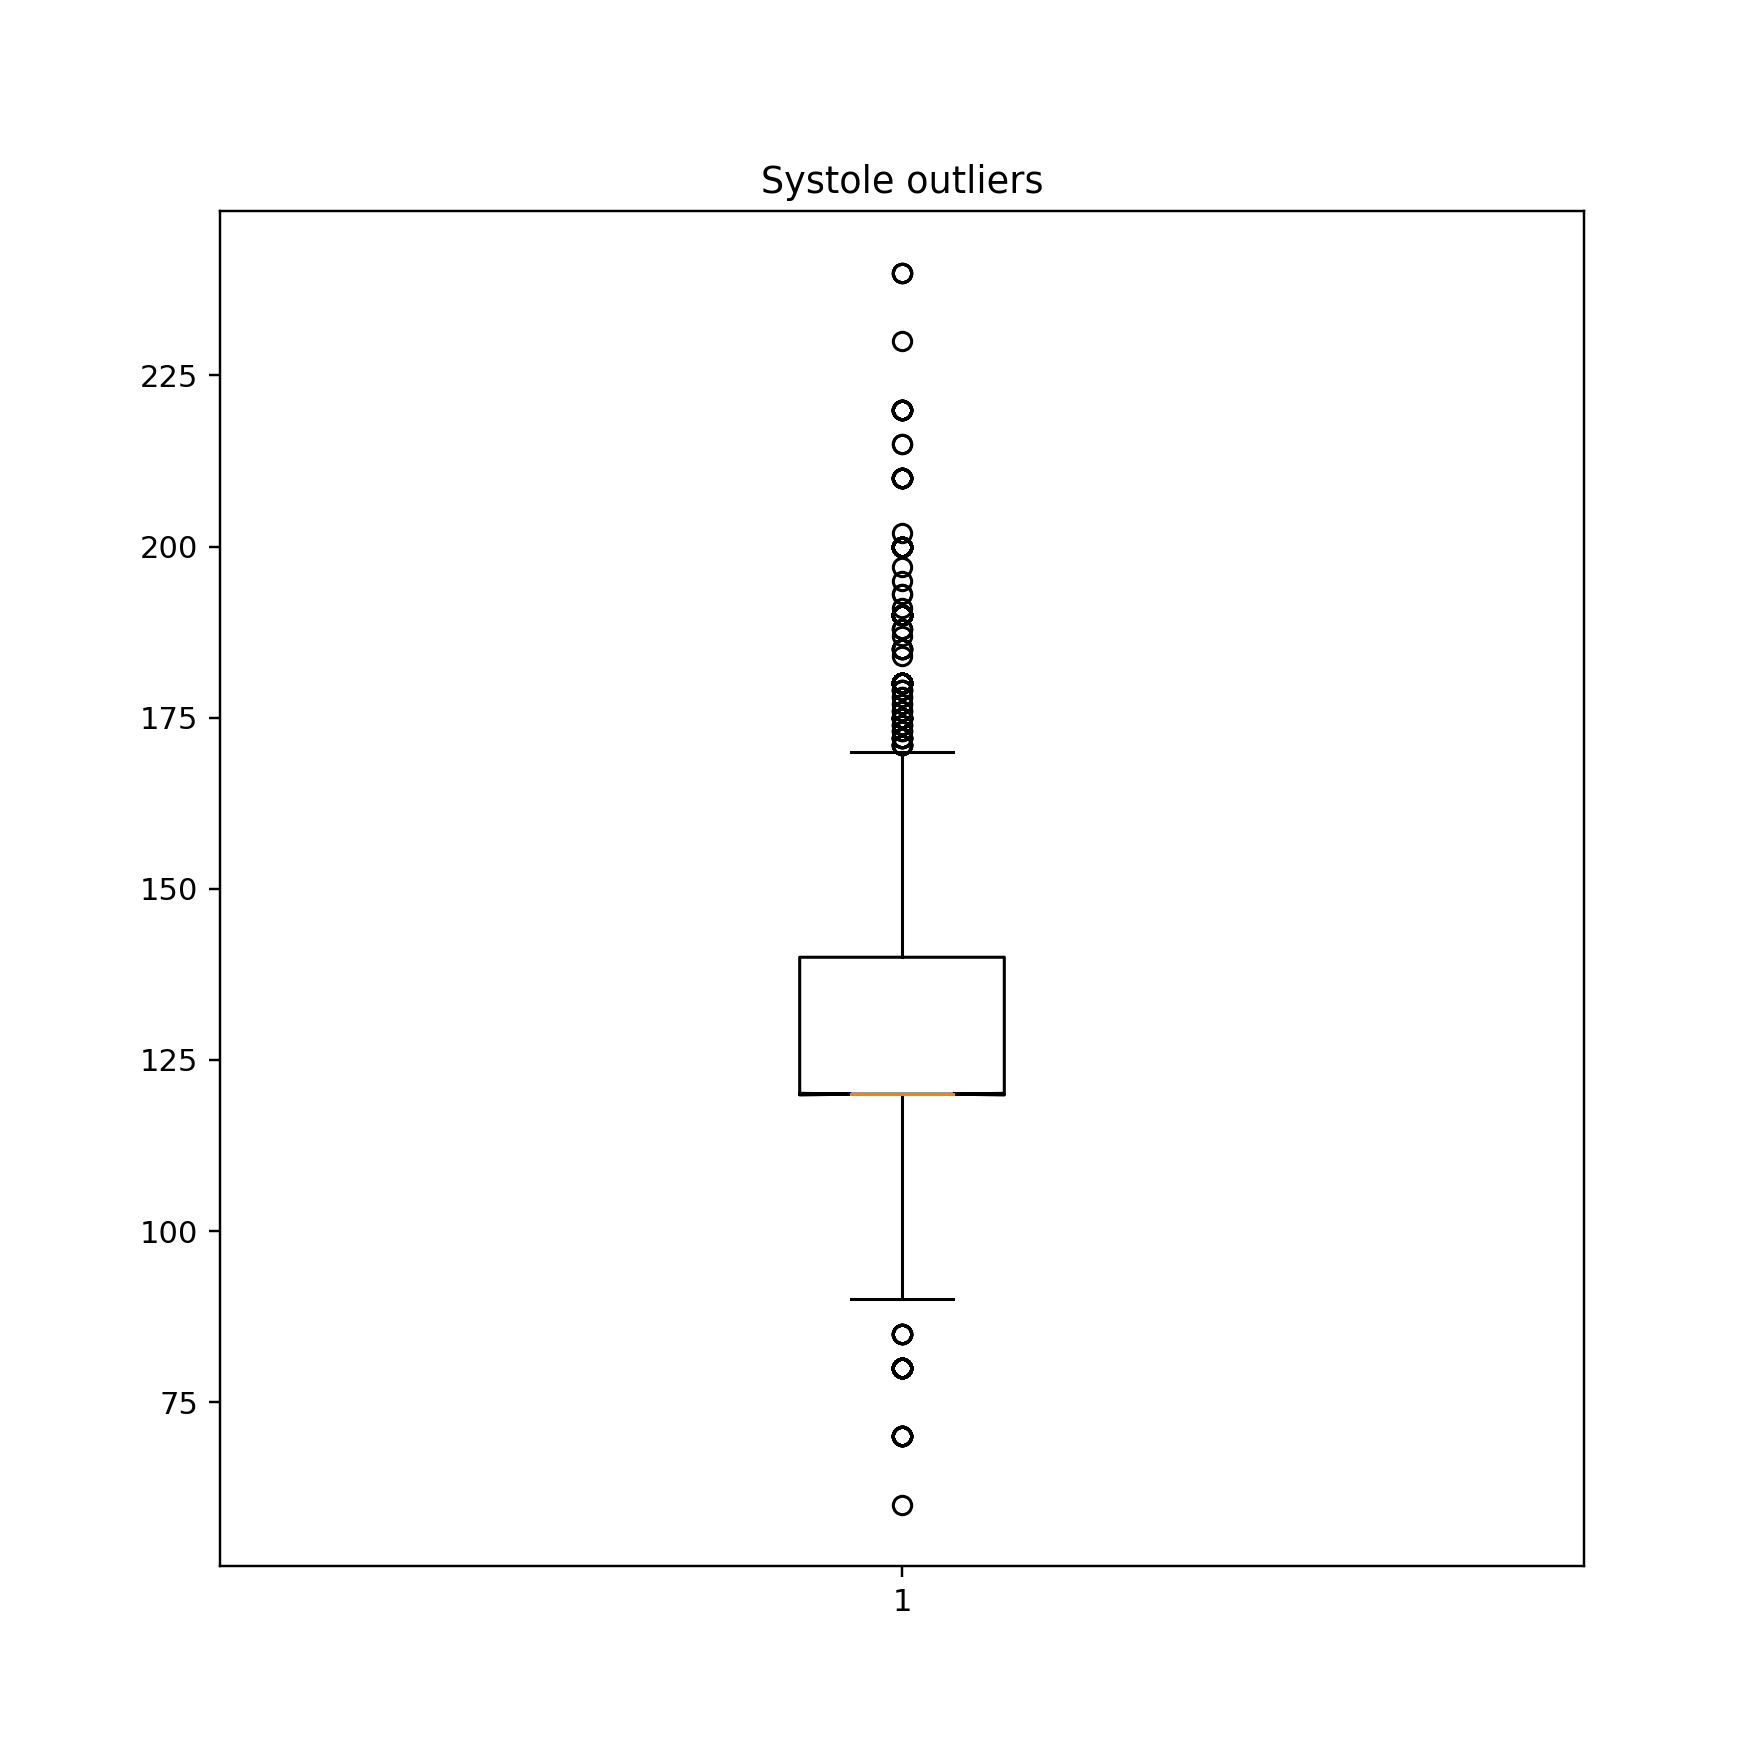

In [15]:
data = [cardio_complete_df["systolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Systole outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


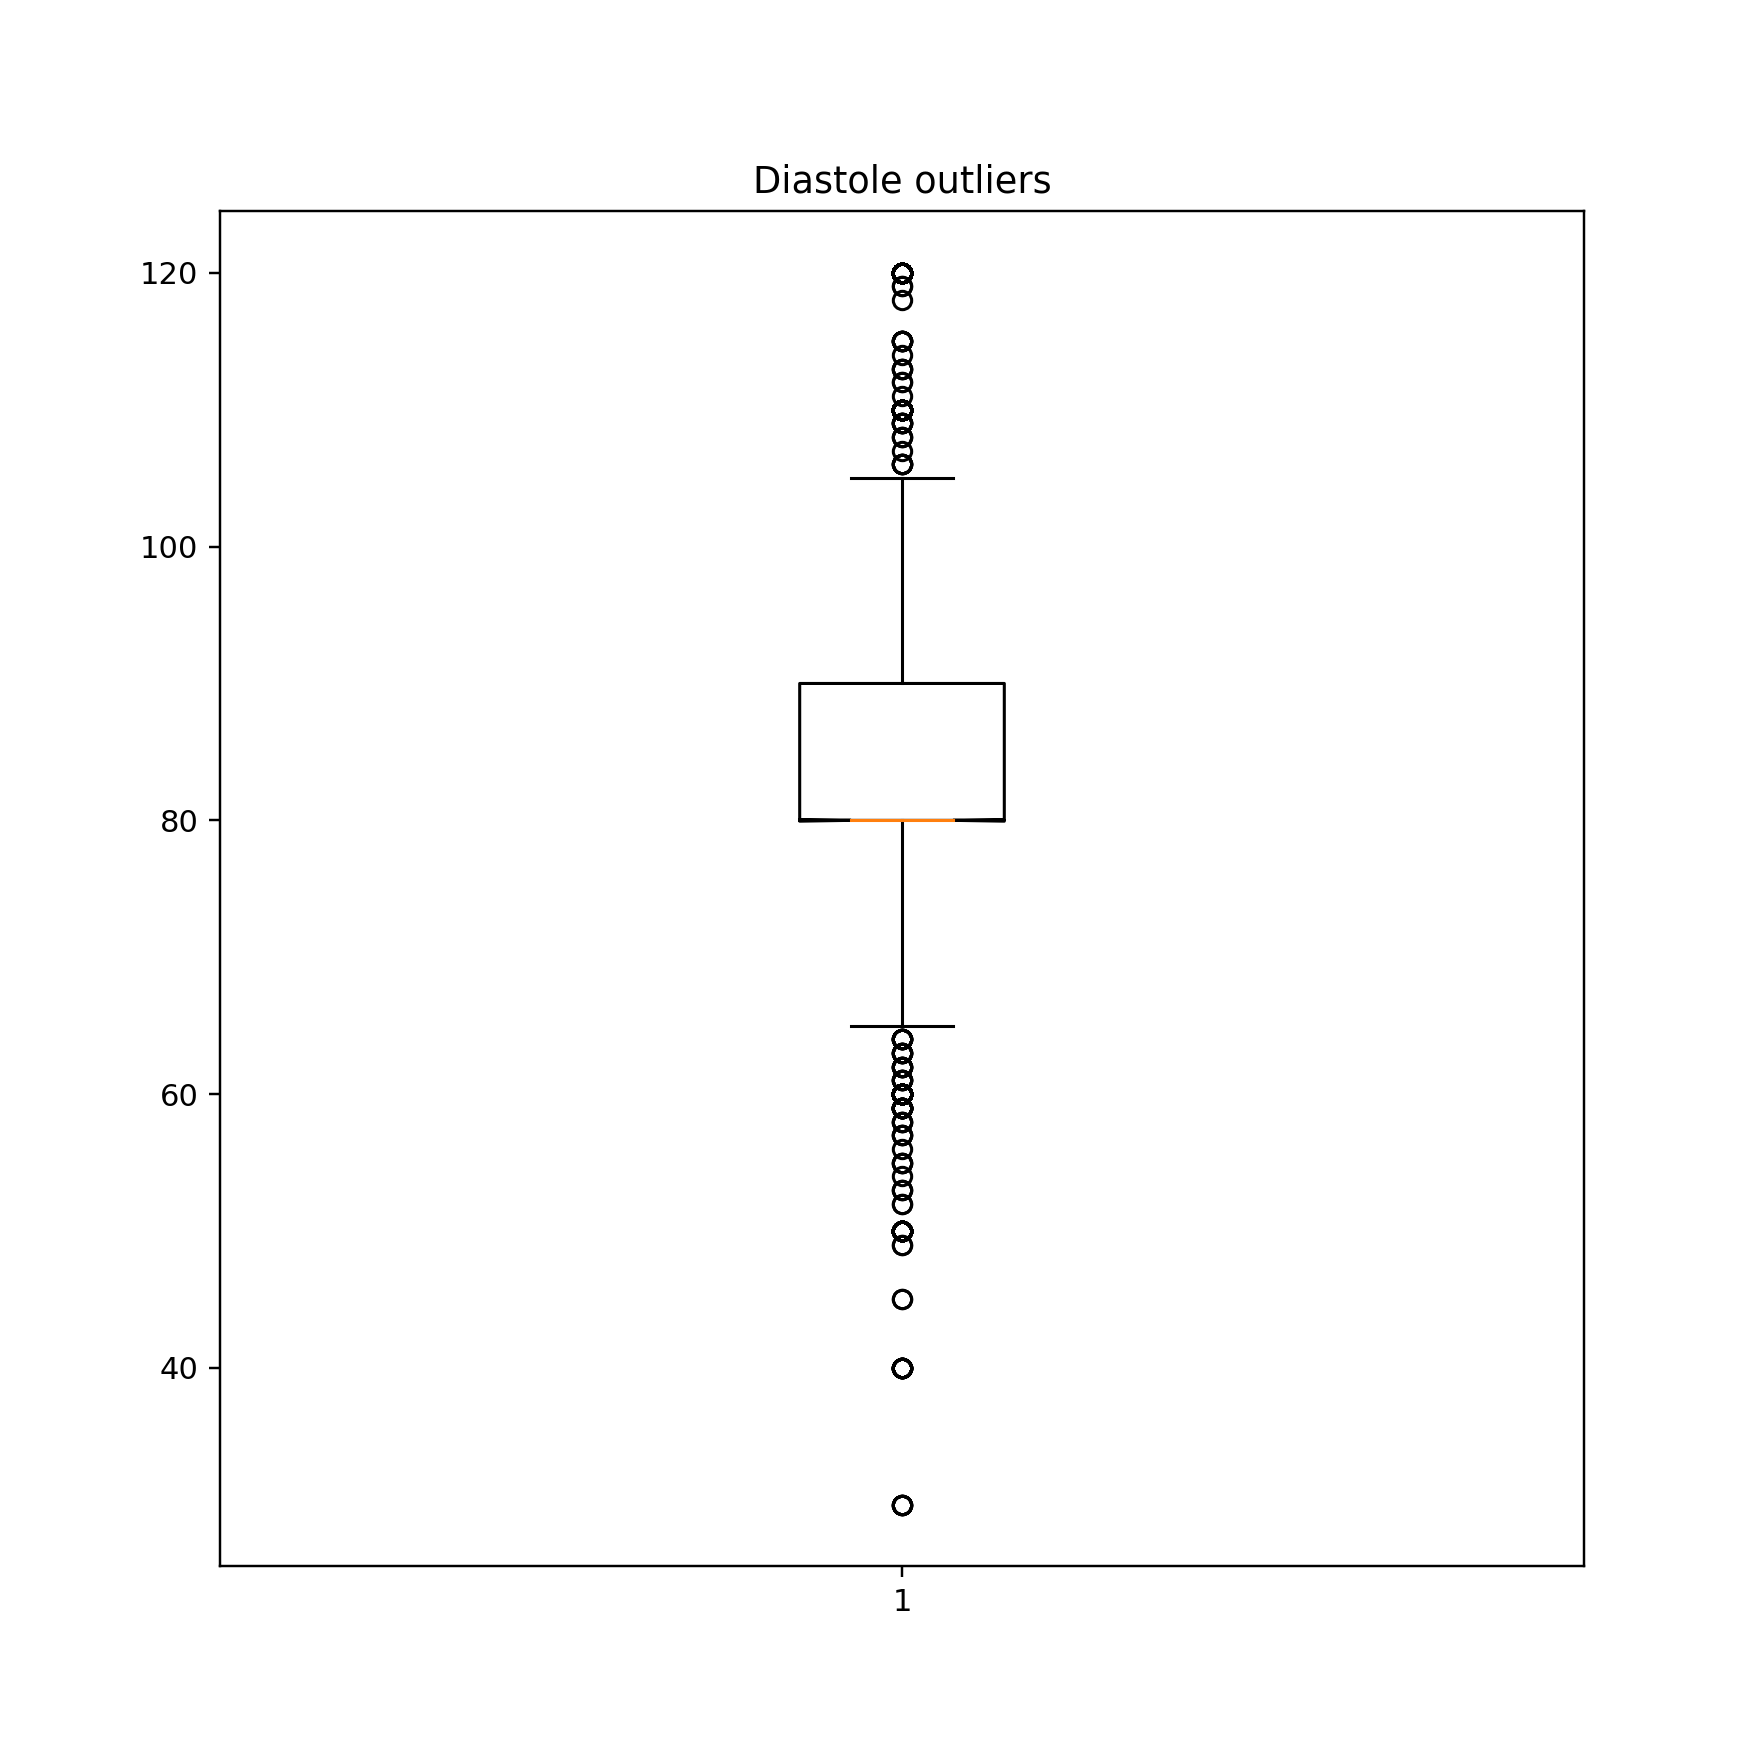

In [16]:
data = [cardio_complete_df["diastolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Diastole outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


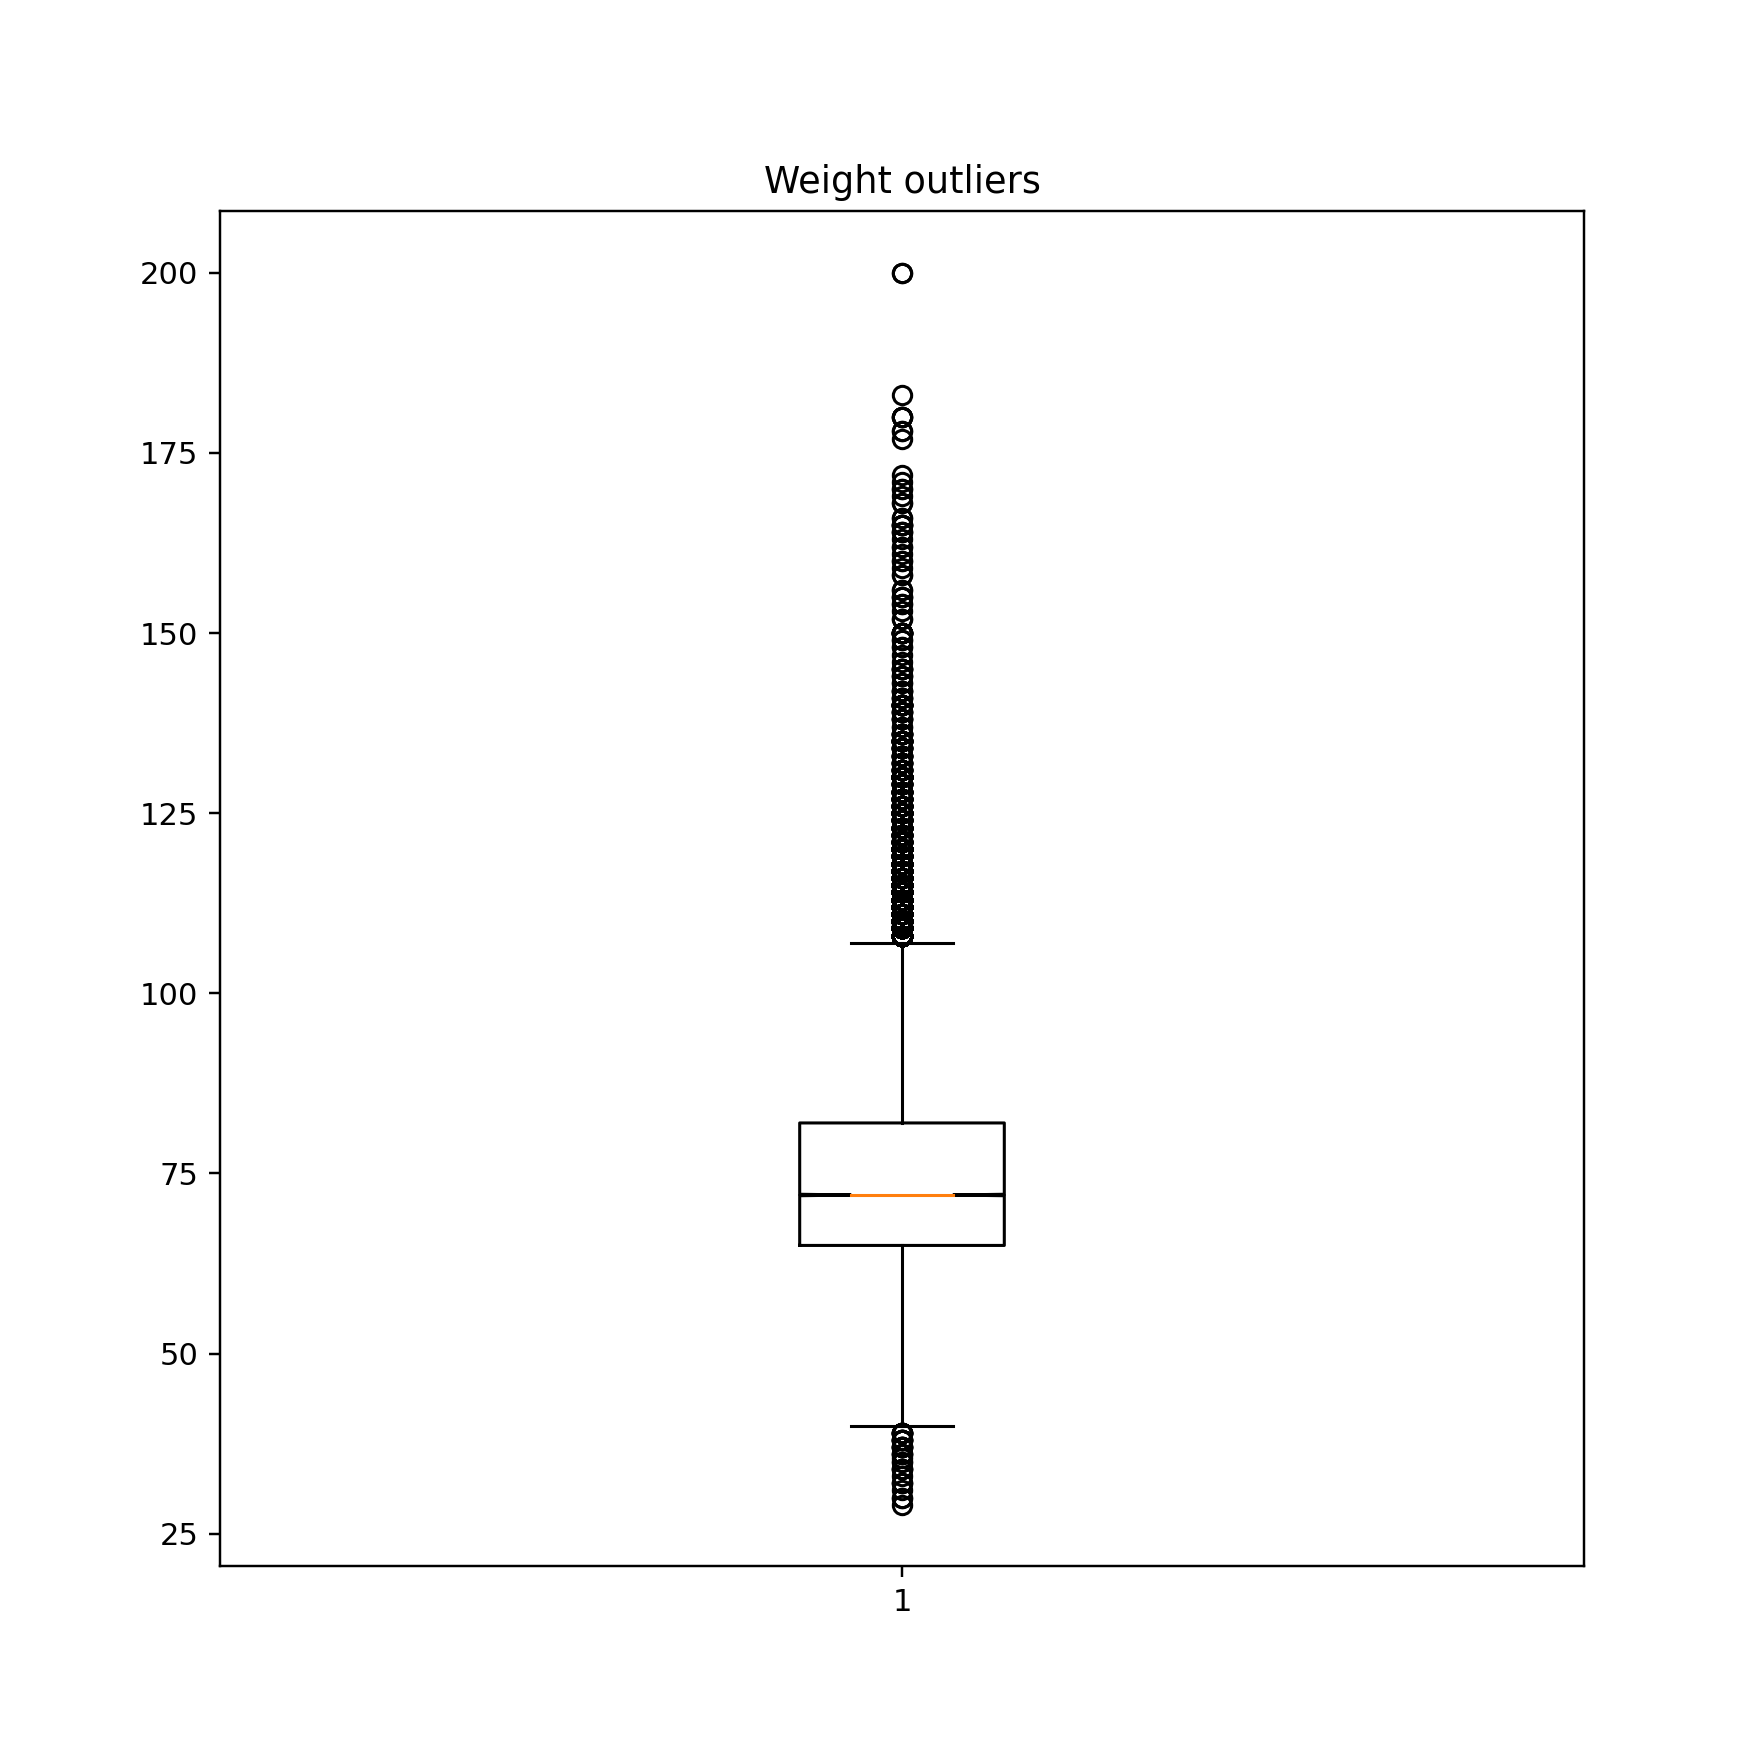

In [17]:
data = [cardio_complete_df["weight"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Weight outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


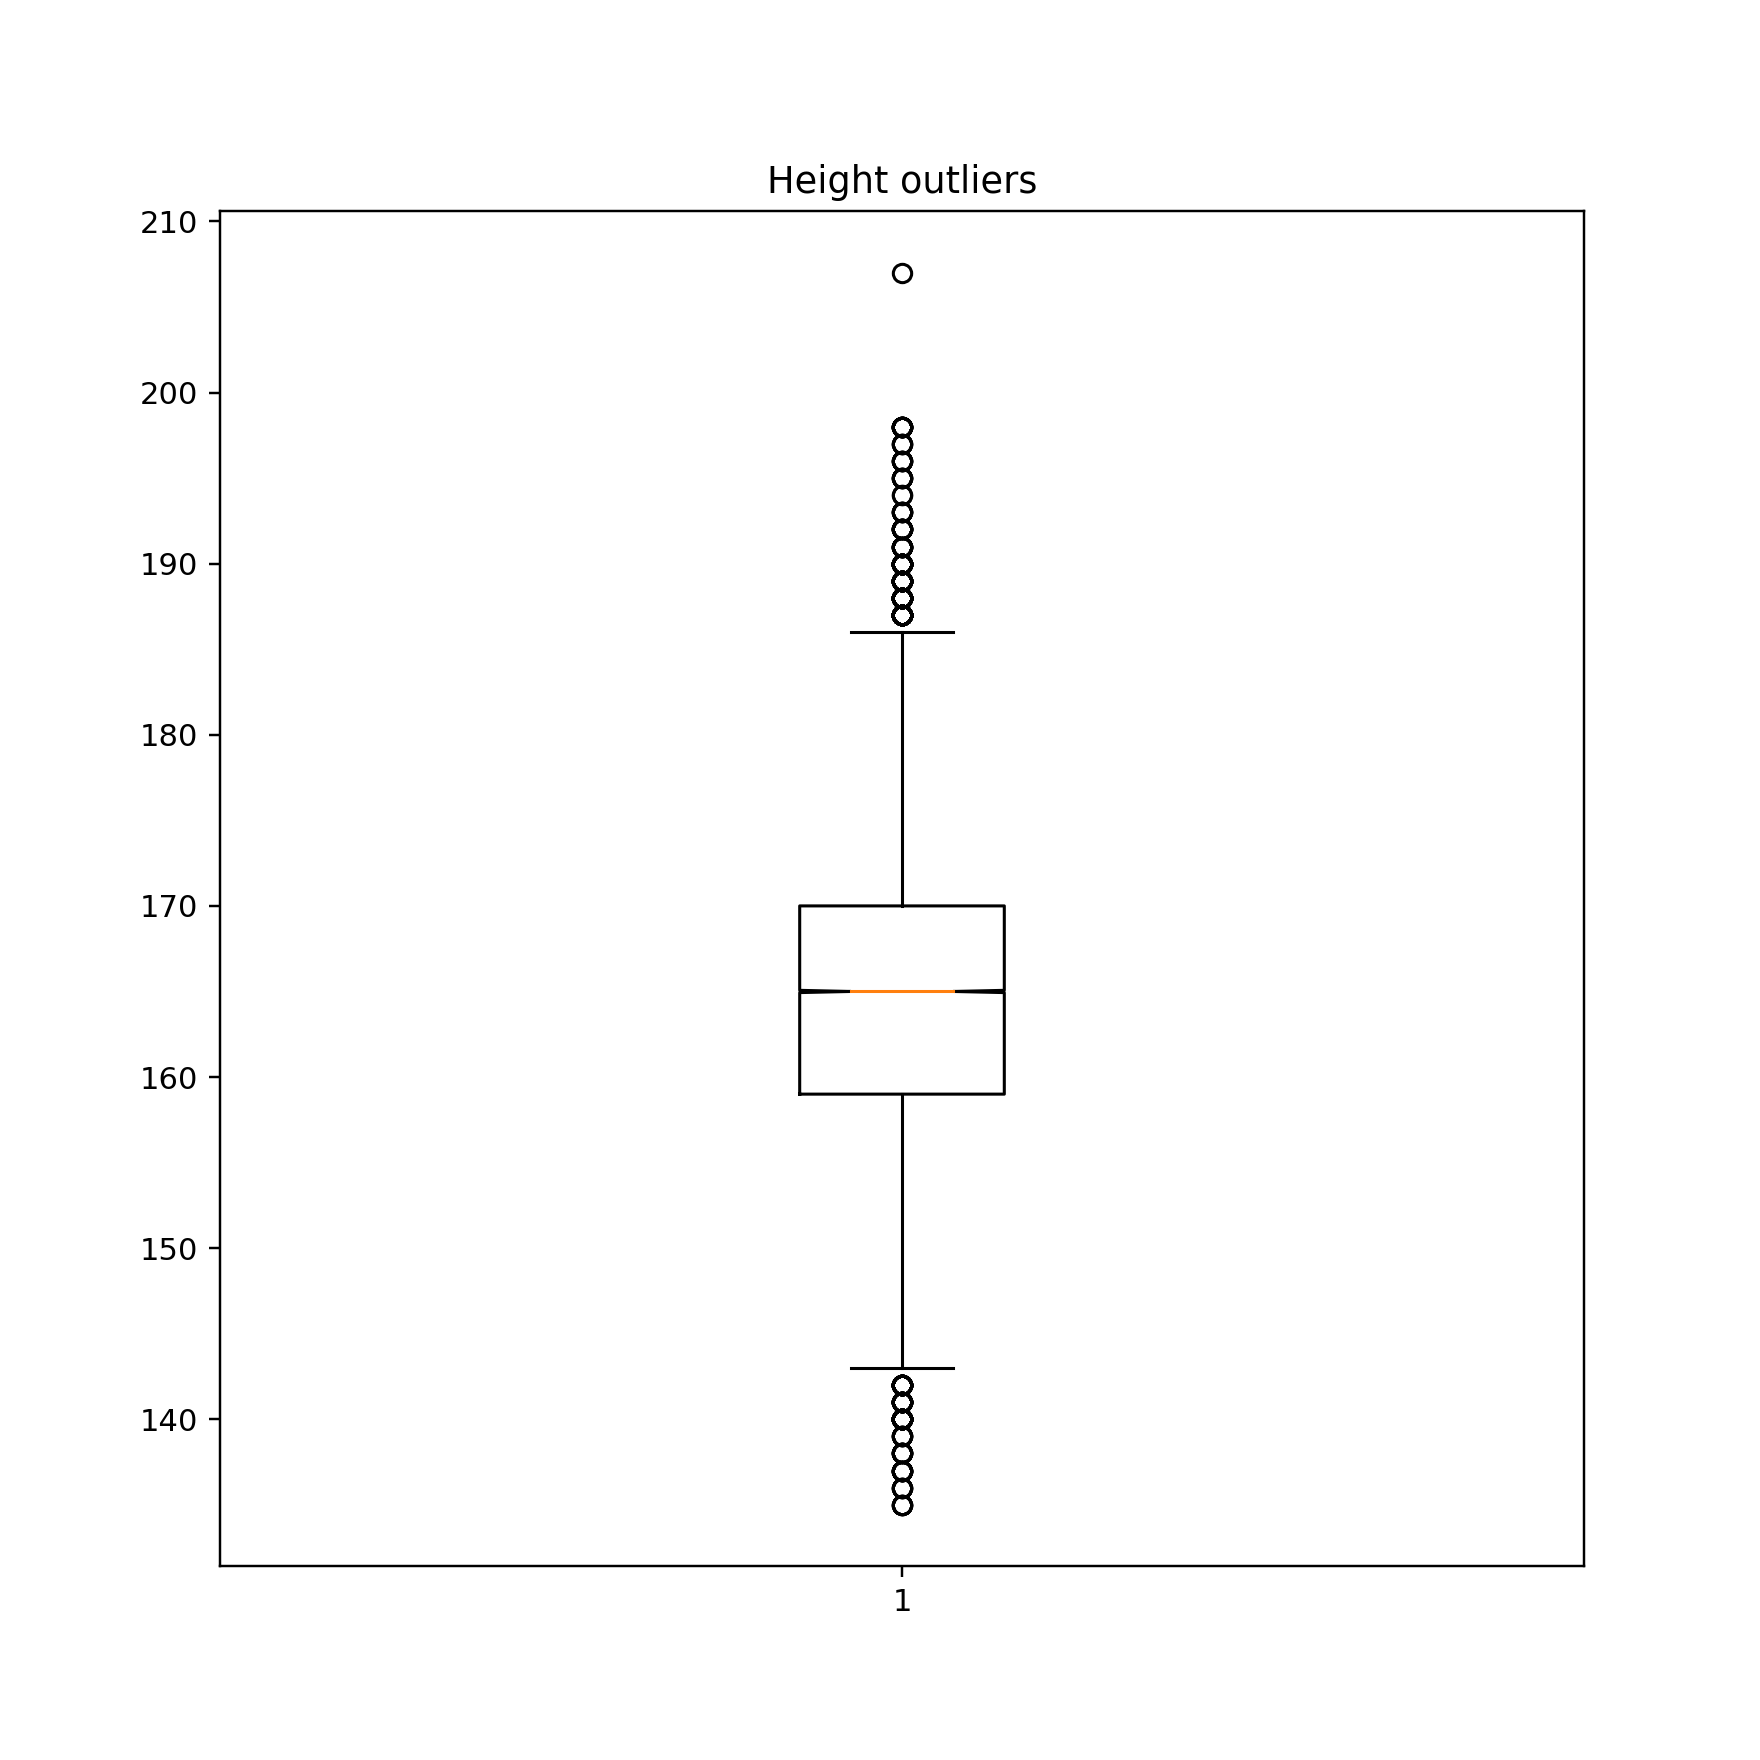

In [18]:
data = [cardio_complete_df["height"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Height outliers')
ax1.boxplot(data, notch= True)
plt.show()

In [19]:
cholesterol_cardio_df = cardio_complete_df["cardio_disease"].groupby(cardio_complete_df["cholesterol"]).mean()
cholesterol_cardio_df.head()

cholesterol
1.0    0.43518
2.0    0.59593
3.0    0.76222
Name: cardio_disease, dtype: float64

<IPython.core.display.Javascript object>


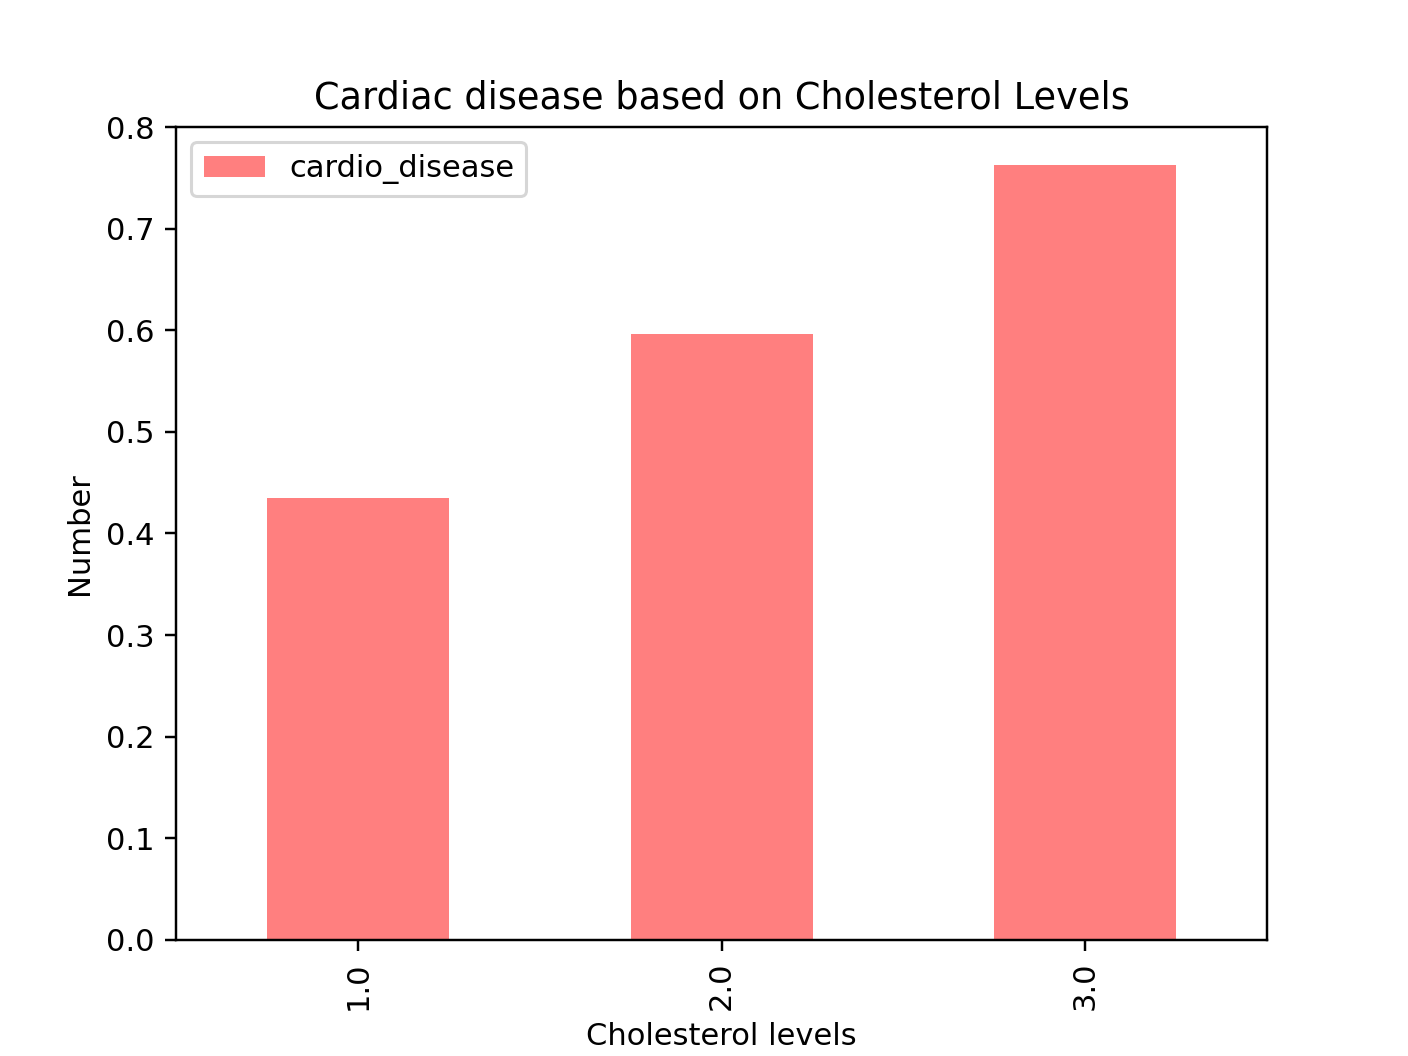

In [20]:
cholesterol_cardio_df.plot.bar(color='r', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Cholesterol levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Cholesterol Levels")
# Add the legend.
plt.legend()

### People with very high Cholesterol level have a greater chance of developing heart disease.

In [21]:
glucose_cardio_df = cardio_complete_df["cardio_disease"].groupby(cardio_complete_df["glucose"]).mean()
glucose_cardio_df.head()

glucose
1.0    0.475363
2.0    0.587490
3.0    0.617421
Name: cardio_disease, dtype: float64

<IPython.core.display.Javascript object>


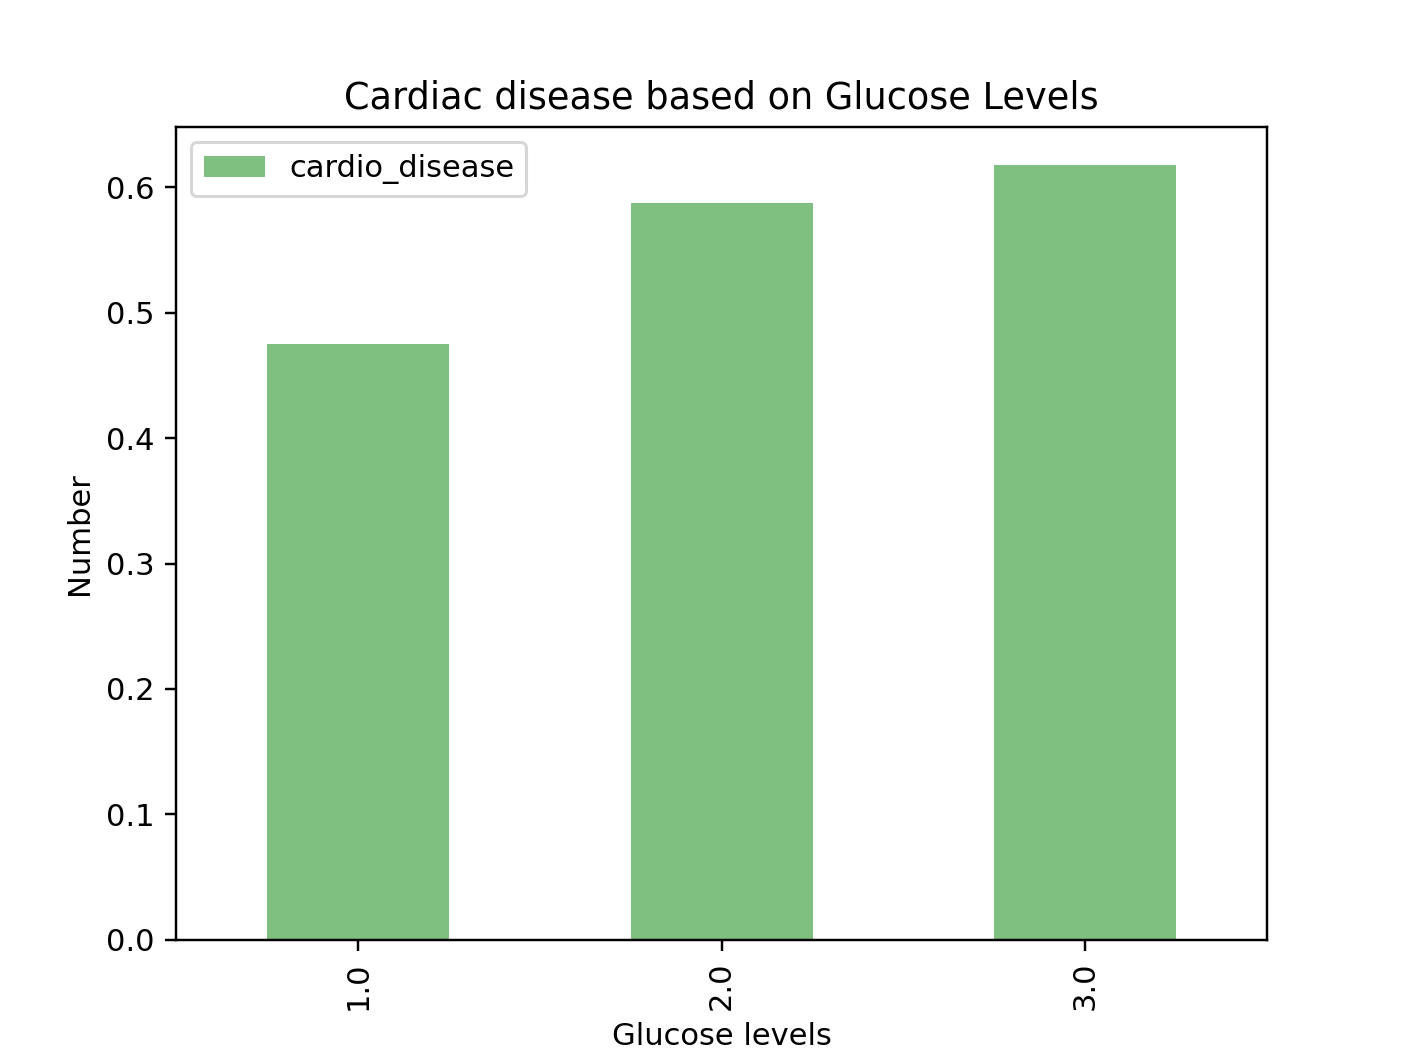

In [22]:
glucose_cardio_df.plot.bar(color='green', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Glucose levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Glucose Levels")
# Add the legend.
plt.legend()

### People with very high Glucose level have a greater chance of developing heart disease.

In [23]:
gender_cardio_df = cardio_complete_df["cardio_disease"].groupby(cardio_complete_df["gender"]).mean()
gender_cardio_df.head()

gender
1.0    0.491918
2.0    0.499101
Name: cardio_disease, dtype: float64

<IPython.core.display.Javascript object>


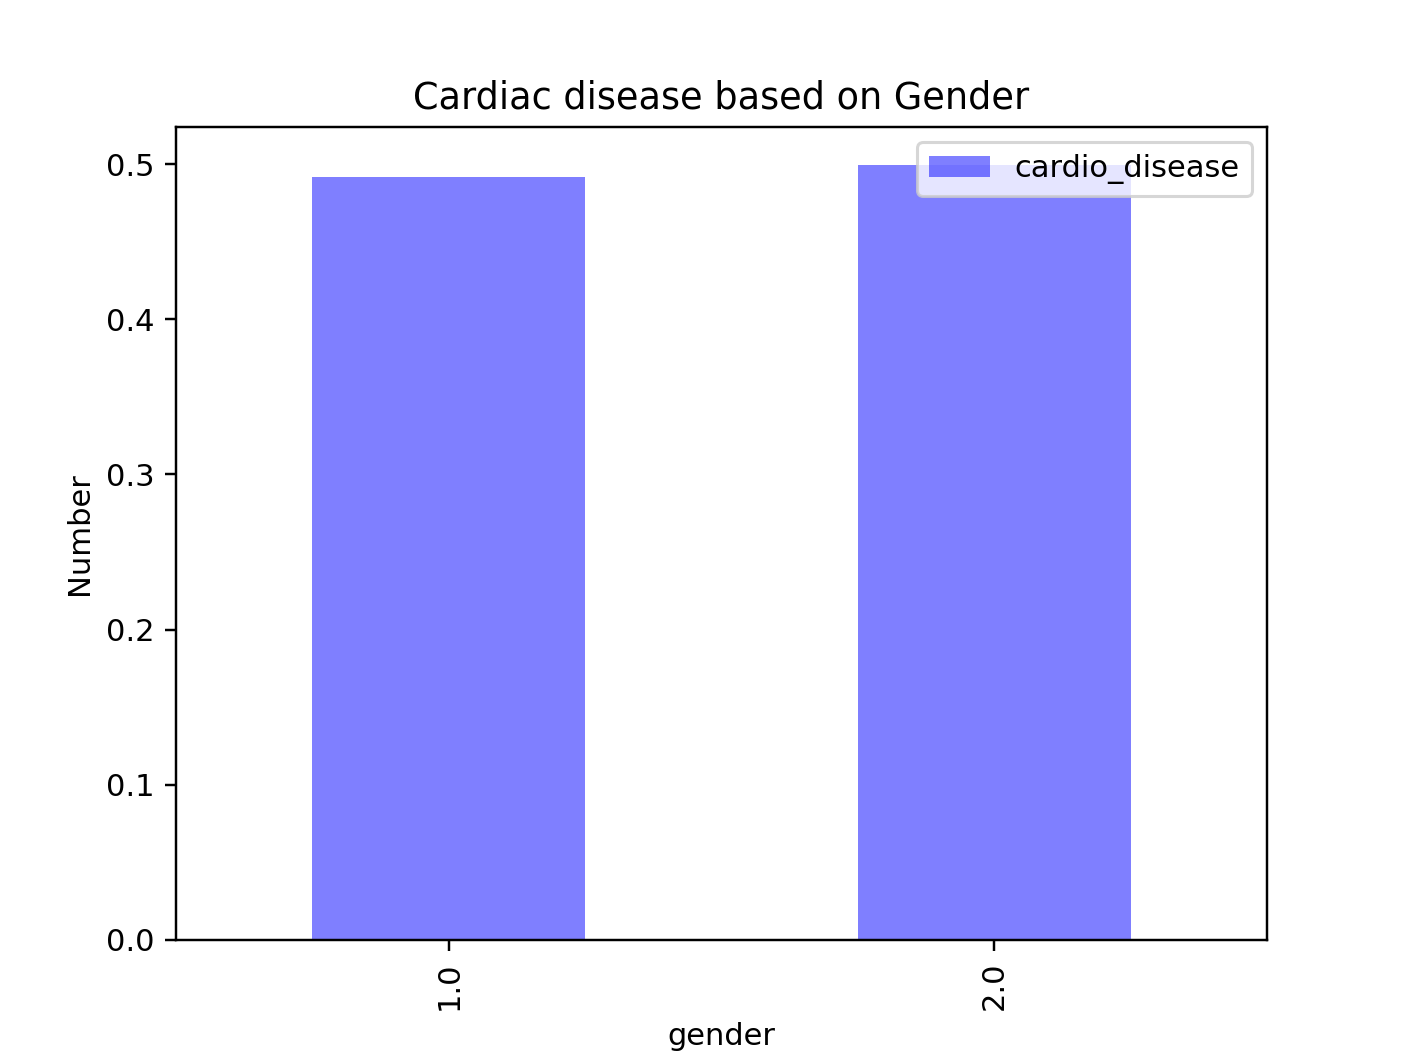

In [24]:
gender_cardio_df.plot.bar(color='blue', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("gender")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Gender")
# Add the legend.
plt.legend()

In [25]:
alcohol_cardio_df = cardio_complete_df["cardio_disease"].groupby(cardio_complete_df["alcohol_intake"]).mean()
alcohol_cardio_df.head()

alcohol_intake
0.0    0.495463
1.0    0.475969
Name: cardio_disease, dtype: float64

<IPython.core.display.Javascript object>


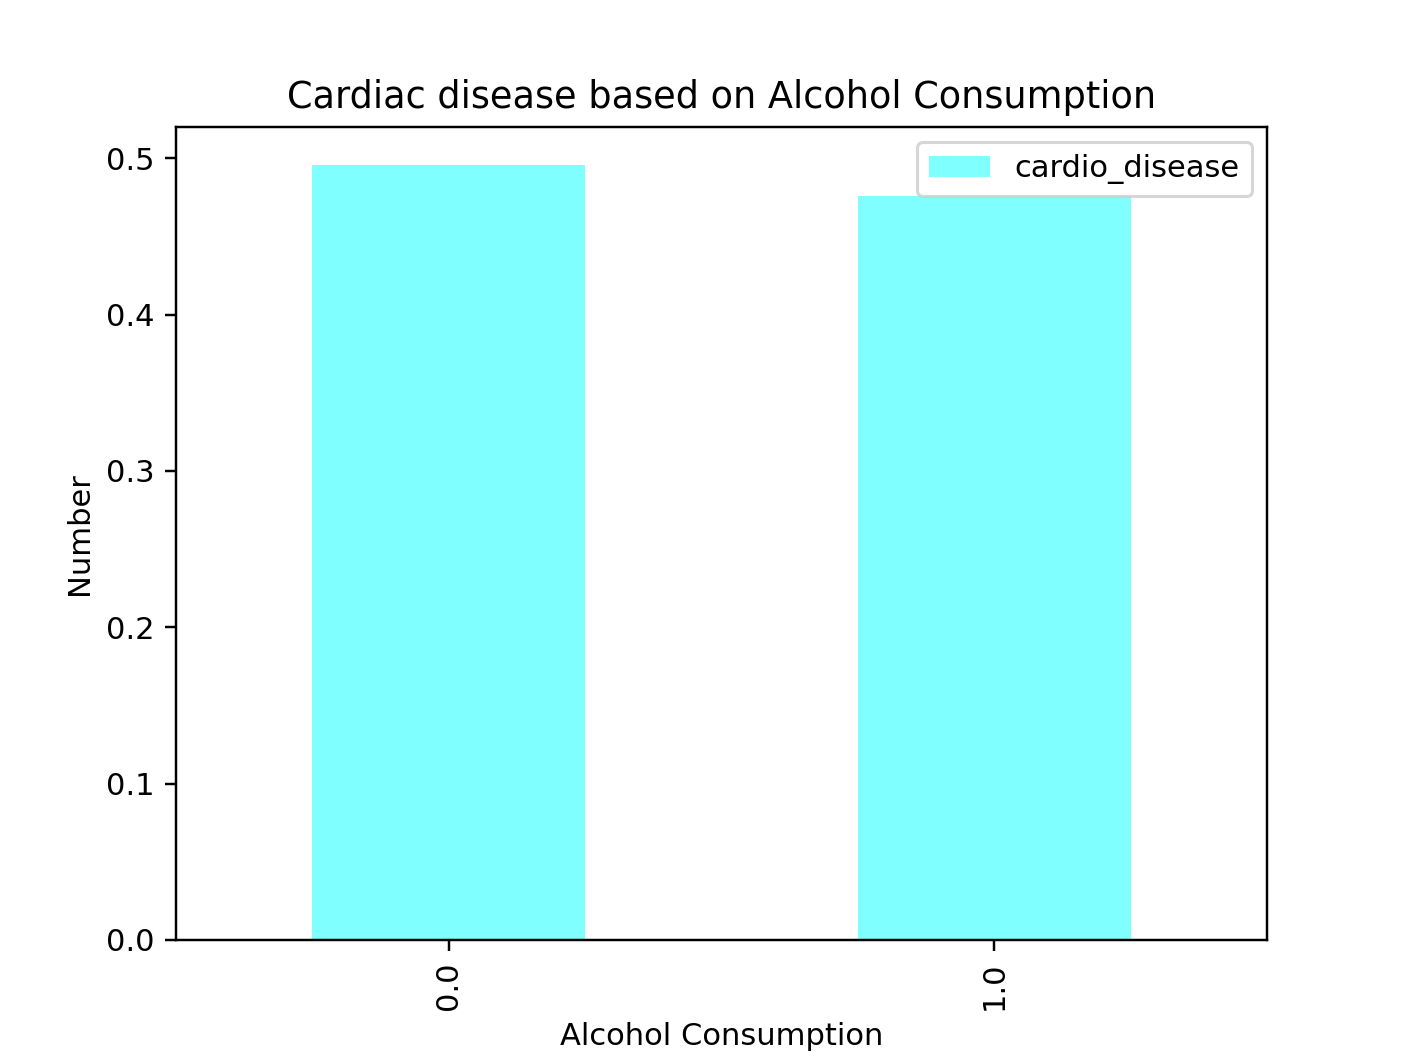

In [26]:
alcohol_cardio_df.plot.bar(color='cyan', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Alcohol Consumption")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Alcohol Consumption")
# Add the legend.
plt.legend()

### Alcohol consumption alone doesnot Contribute to developing heart disease.

## Relation between Cholesterol levels and heart disease based on gender.

In [30]:
# grouping cholesterol based on gender.
cholesterol_cardio_df = cardio_complete_df.groupby(["cholesterol","gender"]).mean()
cholesterol_cardio_df

id        age      height     weight        bmi  \
cholesterol gender                                                              
1.0         1.0     49837.290833  52.392082  161.787317  71.280270  27.284743   
            2.0     49981.058138  52.184880  169.904821  76.000510  26.289810   
2.0         1.0     49908.670987  53.339574  160.644103  74.516060  28.913506   
            2.0     50279.723593  52.913787  170.598552  80.705956  27.683350   
3.0         1.0     50329.232271  55.828329  160.387180  77.300239  30.104863   
            2.0     50653.988463  55.470540  170.361351  81.609271  28.038360   

                    weight_status  obesity_status  systolic_bp  diastolic_bp  \
cholesterol gender                                                             
1.0         1.0          2.850036        0.298836   123.941251     79.956772   
            2.0          2.724768        0.213515   126.208959     81.331959   
2.0         1.0          3.097616        0.433189   129.316691     82.265002   
            2.0          2.970714        0.337611   133.745311     84.634090   
3.0         1.0          3.233929        0.514459   133.459016     84.480936   
            2.0          3.032963        0.377421   134.363412     85.268232   

                     glucose    smoker  alcohol_intake    active  \
cholesterol gender                                                 
1.0         1.0     1.097702  0.015763        0.020644  0.801867   
            2.0     1.102229  0.209230        0.096589  0.803135   
2.0         1.0     1.337174  0.024164        0.038886  0.793247   
            2.0     1.327410  0.273774        0.150049  0.806844   
3.0         1.0     1.948794  0.022656        0.037392  0.811015   
            2.0     1.871446  0.225793        0.122785  0.830655   

                    cardio_disease  
cholesterol gender                  
1.0         1.0           0.430065  
            2.0           0.444330  
2.0         1.0           0.579133  
            2.0           0.630471  
3.0         1.0           0.767360  
            2.0           0.750721

In [31]:
# Dropping columns not needed
cholesterol_cardio_df.drop(columns=["id","age","height","weight","systolic_bp","diastolic_bp","glucose","smoker","alcohol_intake","active","bmi","weight_status","obesity_status"],inplace=True)
cholesterol_cardio_df.head()

cardio_disease
cholesterol gender                
1.0         1.0           0.430065
            2.0           0.444330
2.0         1.0           0.579133
            2.0           0.630471
3.0         1.0           0.767360

In [33]:
cholesterol_cardio_df.reset_index(inplace=True)
cholesterol_cardio_df

,index,cholesterol,gender,cardio_disease
0,0,1.0,1.0,0.430065
1,1,1.0,2.0,0.444330
2,2,2.0,1.0,0.579133
3,3,2.0,2.0,0.630471
4,4,3.0,1.0,0.767360
5,5,3.0,2.0,0.750721


In [34]:
cholesterol_cardio_df.dtypes

index               int64
cholesterol       float64
gender            float64
cardio_disease    float64
dtype: object

In [35]:
df_male = cholesterol_cardio_df[cholesterol_cardio_df["gender"] == 1.0]
df_male

,index,cholesterol,gender,cardio_disease
0,0,1.0,1.0,0.430065
2,2,2.0,1.0,0.579133
4,4,3.0,1.0,0.767360


In [36]:
df_female = cholesterol_cardio_df[cholesterol_cardio_df["gender"] == 2.0]
df_female

,index,cholesterol,gender,cardio_disease
1,1,1.0,2.0,0.444330
3,3,2.0,2.0,0.630471
5,5,3.0,2.0,0.750721


<IPython.core.display.Javascript object>


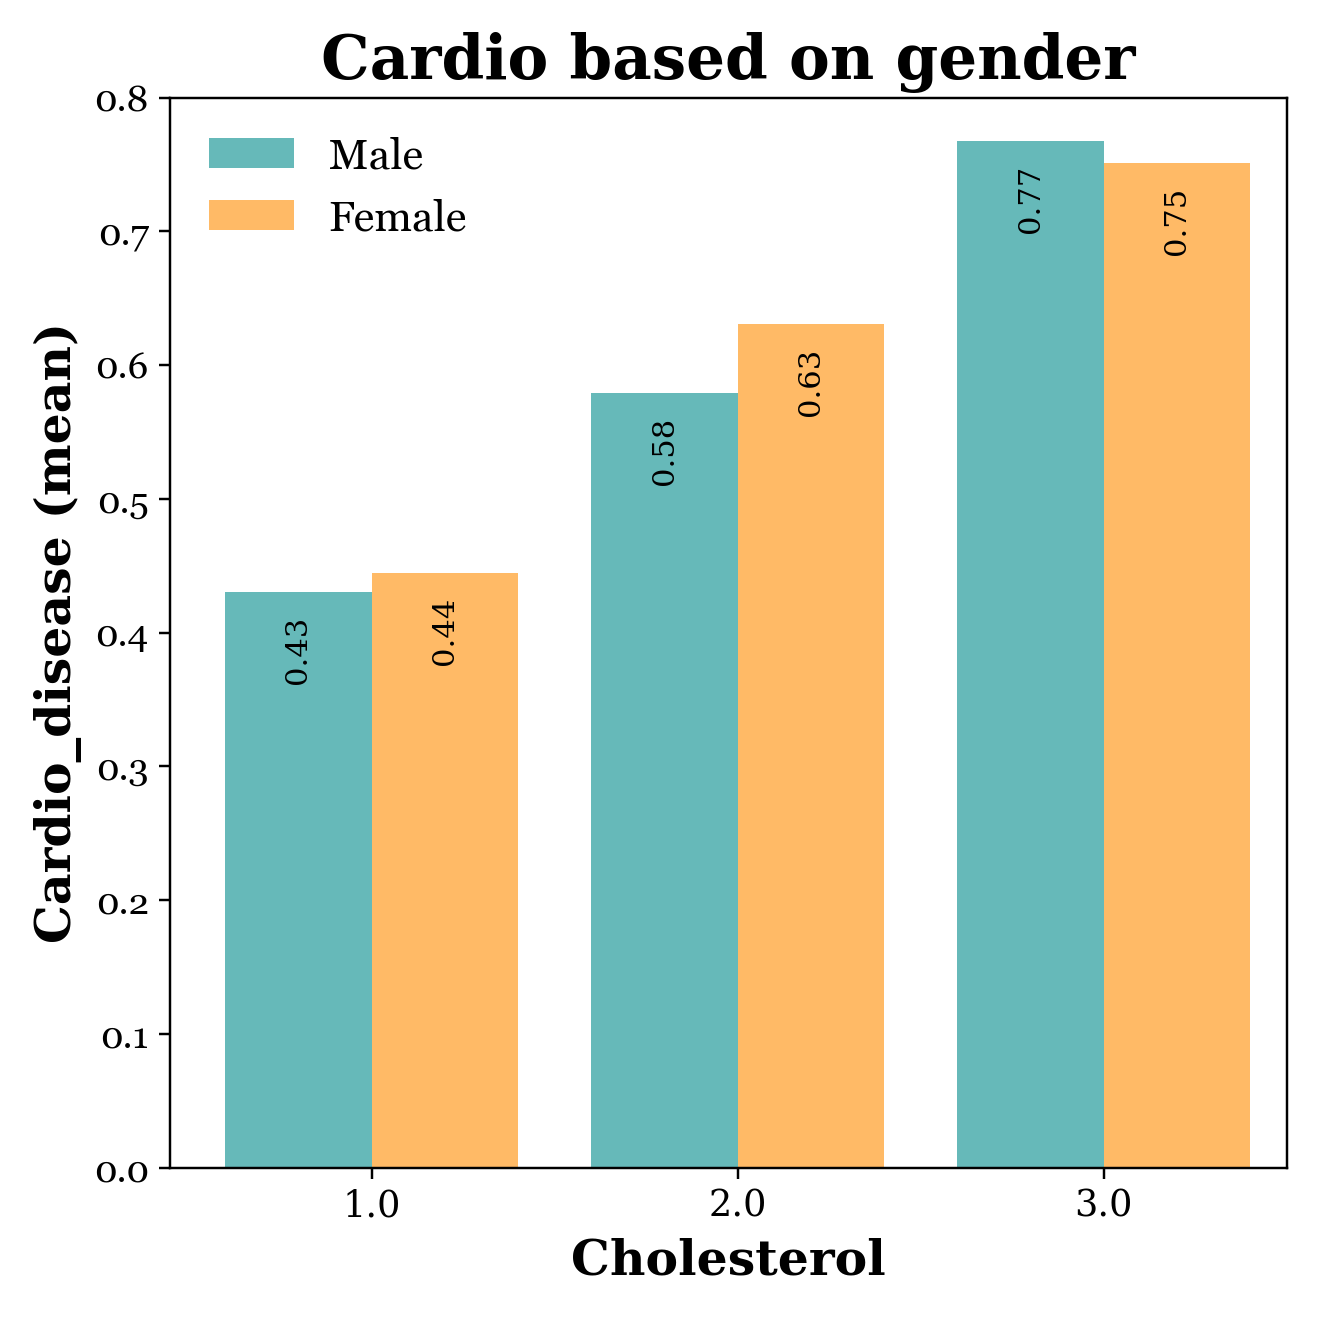

In [37]:
import matplotlib.colors as mcolors
import matplotlib.font_manager
import numpy as np
# Create a font library
plt.rcParams["font.family"]="Georgia","Arial","Times New Roman","serif"
titlefont = {"fontname":"Georgia"}
labelfont = {"fontname":"serif"}
# Define the figure size
fig,ax = plt.subplots(figsize=(6,6))
# Define x-axis for the plot
x = np.arange(len(df_male["cholesterol"]))
# Define the x label
labels = df_male["cholesterol"]
# Format the graph
width = 0.4 # bar width
rects1 = ax.bar(x - width/2, df_male["cardio_disease"], width, color = "darkcyan", alpha = 0.6, label = "Male")
rects2 = ax.bar(x + width/2, df_female["cardio_disease"], width, color = "darkorange", alpha = 0.6, label = "Female")
# Set Chart labels and title
ax.set_title("Cardio based on gender", fontsize=20, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_xlabel("Cholesterol", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_ylabel("Cardio_disease (mean)", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
# Set xticks, labels and legends
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,**labelfont)
# Set the x_limits of the plot
ax.set_xlim(-0.55,len(x)-0.5)
# Set the y_limits of the plot
ax.set_ylim(0,0.8)
# Format legend size
ax.legend(prop=dict(size=14),framealpha=1, frameon=False)
ax.tick_params(axis="y", labelsize=12)
# Define a function that annotates the labels on the plot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                   xy = (rect.get_x() + rect.get_width()/2, height),
                   xytext=(0,-30), # vertical offset
                   textcoords="offset points",rotation=90,
                   ha="center",fontsize=10,color="black",va="bottom",**labelfont)
# Annotate the labels for the bars
autolabel(rects1)
autolabel(rects2)
# Ensure that x_labels show in the plot
fig.tight_layout()
# Display plot
plt.show()

### Women with normal and moderate cholesterol levels are likely to get cardiac disease slightly more than men, whereas men with high cholesterol levels are at a higher risk at developing heart disease. 

## Relation between Glucose levels and heart disease based on gender.

In [38]:
# grouping glucose based on gender.
glucose_cardio_df = cardio_complete_df.groupby(["glucose","gender"]).mean()
glucose_cardio_df.head()

id        age      height     weight        bmi  \
glucose gender                                                              
1.0     1.0     49872.001986  52.687017  161.558454  71.754185  27.545201   
        2.0     50073.882439  52.370396  169.970464  76.383840  26.398093   
2.0     1.0     50205.520515  53.396226  160.596586  76.753010  29.807577   
        2.0     49890.084063  53.495622  170.754816  83.067075  28.447577   
3.0     1.0     49998.795015  55.217026  161.191263  75.966984  29.309661   

                weight_status  obesity_status  systolic_bp  diastolic_bp  \
glucose gender                                                             
1.0     1.0          2.889872        0.320214   125.079722     80.474997   
        2.0          2.745998        0.223249   127.366892     81.874702   
2.0     1.0          3.198263        0.494160   130.188979     82.795448   
        2.0          3.088733        0.414478   132.626386     84.325744   
3.0     1.0          3.120134        0.453094   129.938953     82.740689   

                cholesterol    smoker  alcohol_intake    active  \
glucose gender                                                    
1.0     1.0        1.258052  0.016924        0.023599  0.804587   
        2.0        1.231716  0.218189        0.103109  0.806092   
2.0     1.0        1.694519  0.026355        0.042528  0.780473   
        2.0        1.605371  0.253940        0.145359  0.801518   
3.0     1.0        2.412770  0.018762        0.026323  0.791935   

                cardio_disease  
glucose gender                  
1.0     1.0           0.471183  
        2.0           0.483042  
2.0     1.0           0.576520  
        2.0           0.608873  
3.0     1.0           0.632036

In [39]:
# Dropping columns not needed
glucose_cardio_df.drop(columns=["id","age","height","weight","systolic_bp","diastolic_bp","cholesterol","smoker","alcohol_intake","active","bmi","weight_status","obesity_status"],inplace=True)
glucose_cardio_df.head()

cardio_disease
glucose gender                
1.0     1.0           0.471183
        2.0           0.483042
2.0     1.0           0.576520
        2.0           0.608873
3.0     1.0           0.632036

In [40]:
glucose_cardio_df.reset_index(inplace=True)
glucose_cardio_df

,glucose,gender,cardio_disease
0,1.0,1.0,0.471183
1,1.0,2.0,0.483042
2,2.0,1.0,0.576520
3,2.0,2.0,0.608873
4,3.0,1.0,0.632036
5,3.0,2.0,0.585619


In [72]:
df_male = glucose_cardio_df[glucose_cardio_df["gender"] == 1.0]
df_male

,glucose,gender,cardio_disease
0,1.0,1.0,0.471183
2,2.0,1.0,0.576520
4,3.0,1.0,0.632036


In [73]:
df_female = glucose_cardio_df[glucose_cardio_df["gender"] == 2.0]
df_female

,glucose,gender,cardio_disease
1,1.0,2.0,0.483042
3,2.0,2.0,0.608873
5,3.0,2.0,0.585619


In [74]:
df_female.dtypes

glucose           float64
gender            float64
cardio_disease    float64
dtype: object

In [75]:
df_male.dtypes

glucose           float64
gender            float64
cardio_disease    float64
dtype: object

<IPython.core.display.Javascript object>


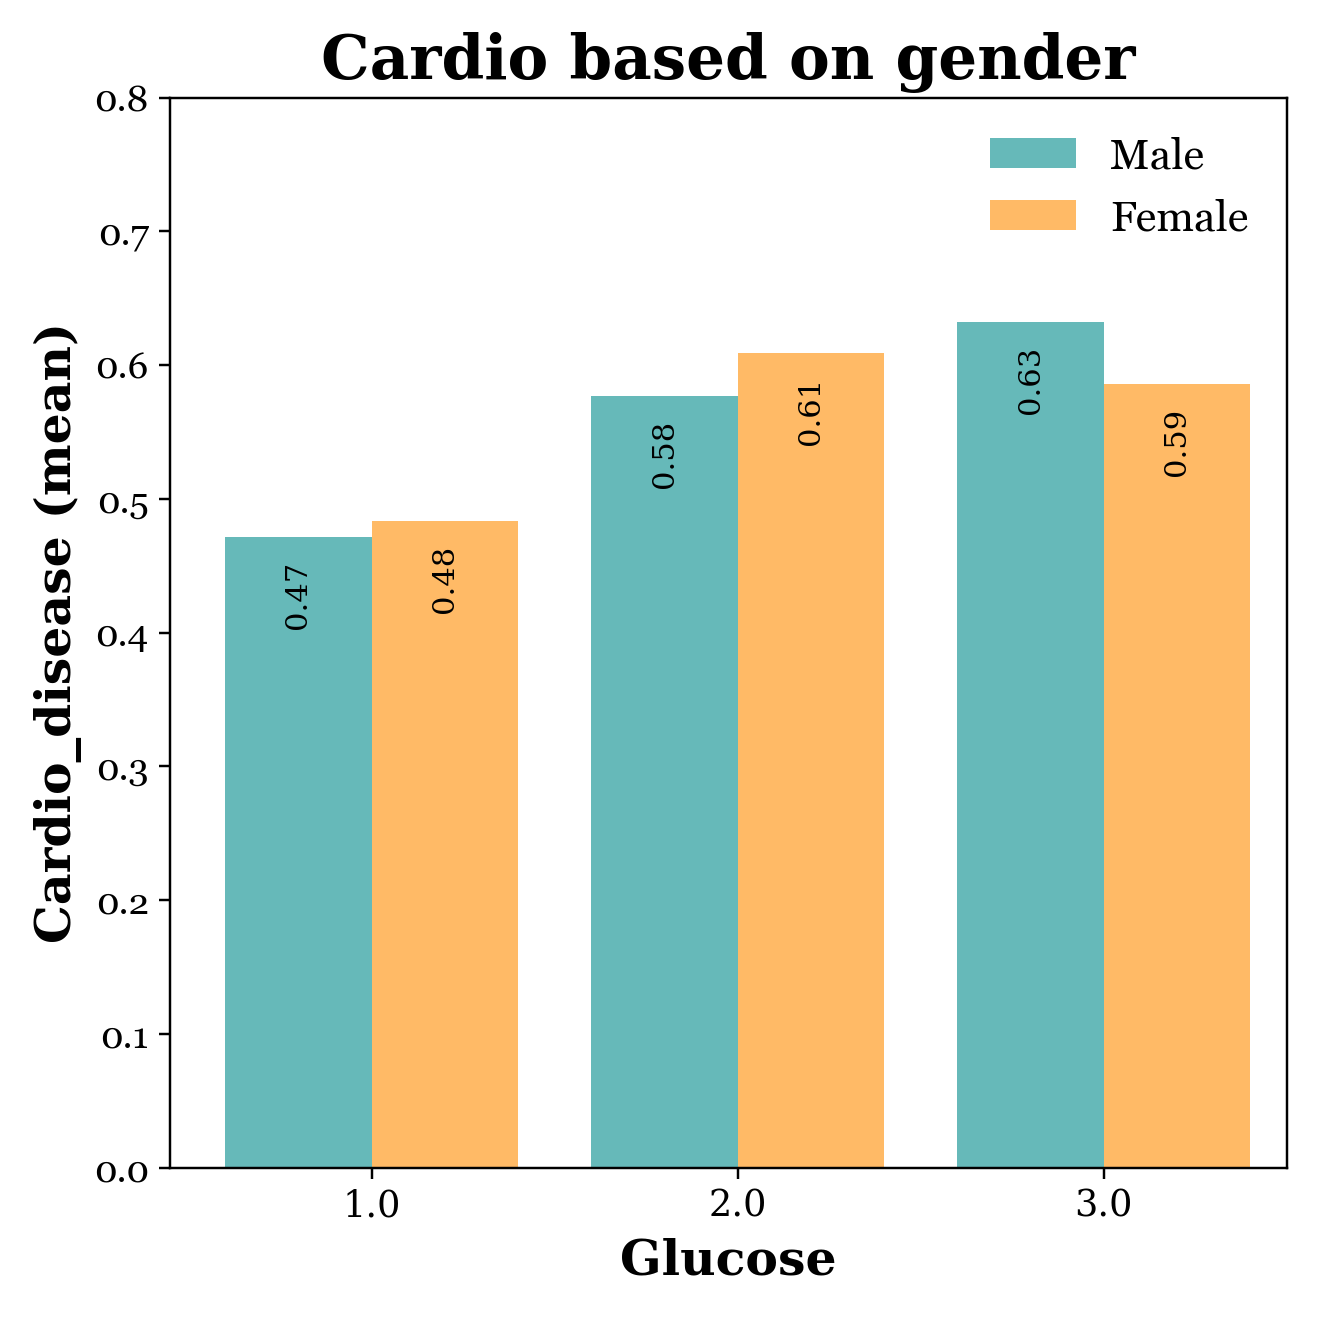

In [76]:
# Create a font library
plt.rcParams["font.family"]="Georgia","Arial","Times New Roman","serif"
titlefont = {"fontname":"Georgia"}
labelfont = {"fontname":"serif"}
# Define the figure size
fig,ax = plt.subplots(figsize=(6,6))
# Define x-axis for the plot
x = np.arange(len(df_female["glucose"]))
# Define the x label
labels = df_female["glucose"]
# Format the graph
width = 0.4 # bar width
rects1 = ax.bar(x - width/2, df_male["cardio_disease"], width, color = "darkcyan", alpha = 0.6, label = "Male")
rects2 = ax.bar(x + width/2, df_female["cardio_disease"], width, color = "darkorange", alpha = 0.6, label = "Female")
# Set Chart labels and title
ax.set_title("Cardio based on gender", fontsize=20, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_xlabel("Glucose", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_ylabel("Cardio_disease (mean)", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
# Set xticks, labels and legends
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,**labelfont)
# Set the x_limits of the plot
ax.set_xlim(-0.55,len(x)-0.5)
# Set the y_limits of the plot
ax.set_ylim(0,0.8)
# Format legend size
ax.legend(prop=dict(size=14),framealpha=1, frameon=False)
ax.tick_params(axis="y", labelsize=12)
# Define a function that annotates the labels on the plot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                   xy = (rect.get_x() + rect.get_width()/2, height),
                   xytext=(0,-30), # vertical offset
                   textcoords="offset points",rotation=90,
                   ha="center",fontsize=10,color="black",va="bottom",**labelfont)
# Annotate the labels for the bars
autolabel(rects1)
autolabel(rects2)
# Ensure that x_labels show in the plot
fig.tight_layout()
# Display plot
plt.show()

### Women with normal and moderate Glucose levels are likely to get cardiac disease slightly more than men, whereas men with high Glucose levels are at a higher risk at developing heart disease.


<IPython.core.display.Javascript object>


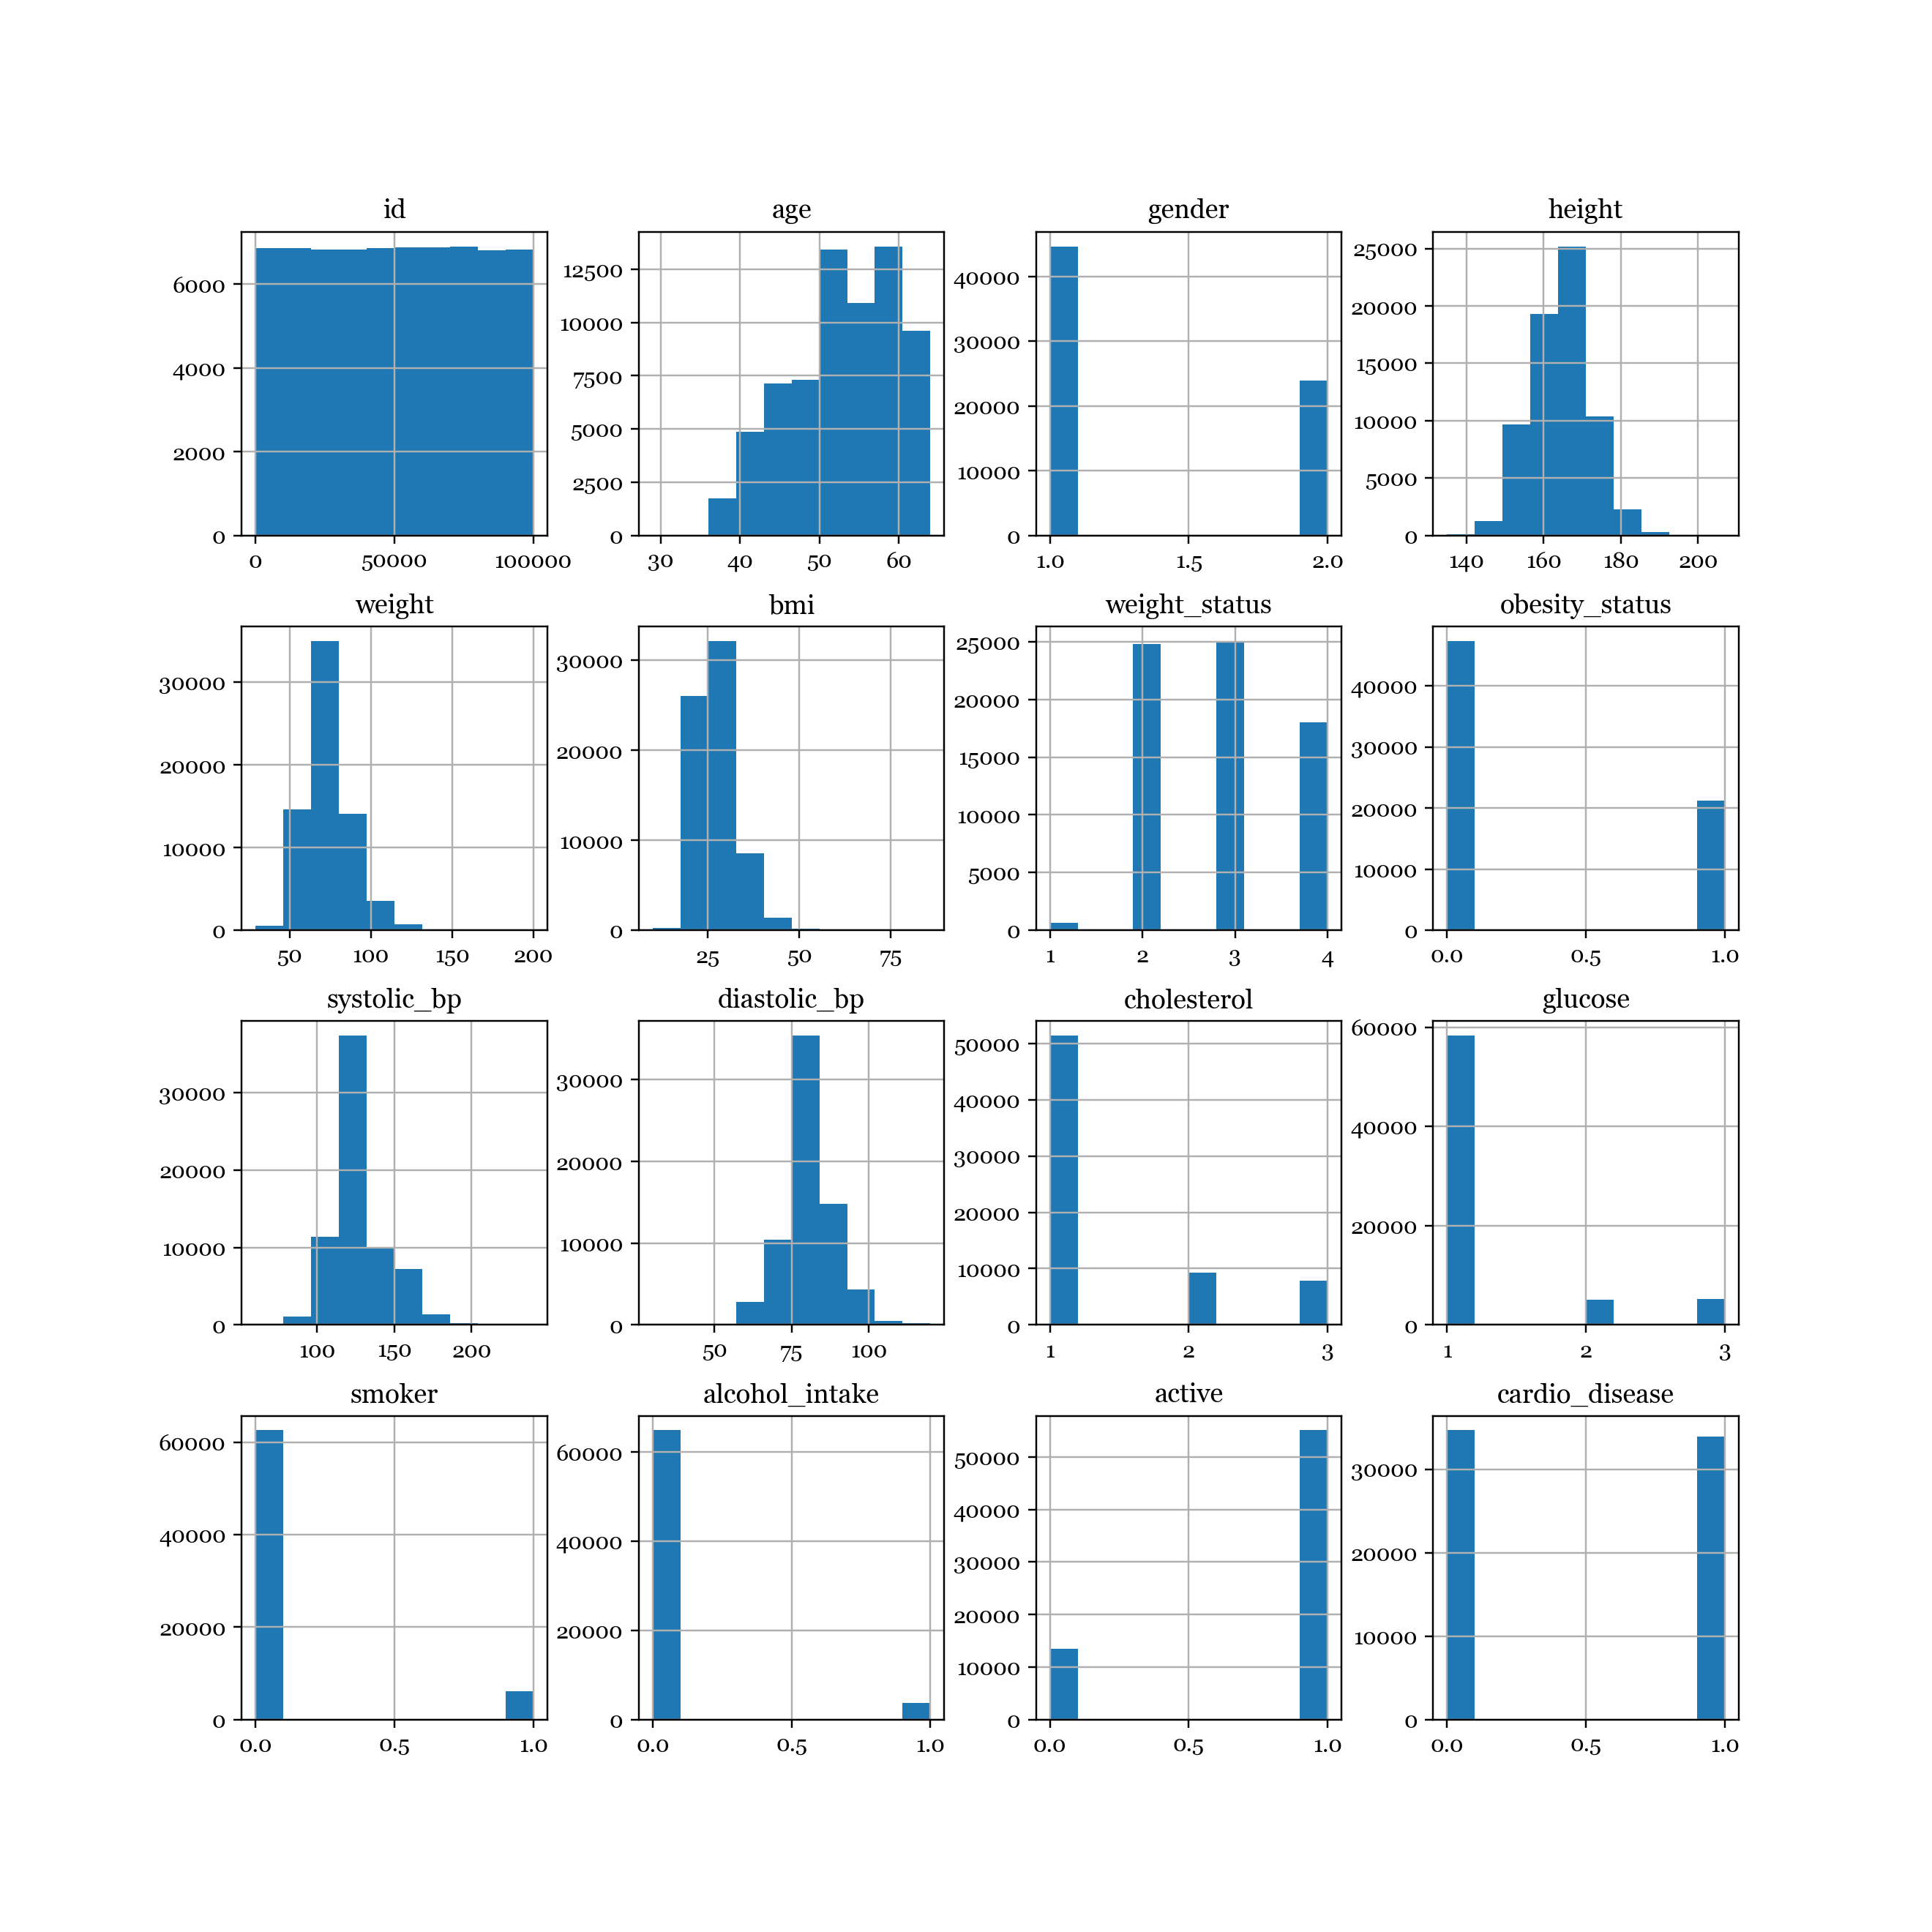

In [44]:
# plot histograms for each variable
cardio_complete_df.hist(figsize = (12, 12))
plt.show()